              INFORMATION ABOUT DATA:
              
                         -> THE DATA SET CONSISTS OF HAND WRITTEN IMAGES ALONG WITH THIER CLASS LABELS
                         
                         -> THE MNIST DATASET IS IN BUILT IN TENSOR FLOW AND ALSO KERAS

               OBJECTIVE:
               
                          -> USING KERAS ON THE MNIST DATA WHICH USER TENSOR FLOW IN THE BACKEND
                          
                          -> TO TRY DIFFERENT ARCHITECTURES OF DIFFERENT NUMBER OF NEURONS IN EACH LAYER
                          
                          -> TO TRY DIFFERENT ACTIVATION FUNCTIONS
                          
                          -> TO INTRODUCE BATCH NORMALIZATION AND DROP OUT IN THE NETWORK
                          
                          -> TO ANALYZE THE WEIGHTS OF EACH LAYER
                          
                          -> TO USE DIFFERENT OPTIMIZATION ALGORITHMS
                          
                          -> USING ACCURACY AS THE MEASURE CHECK

              -> Importing the required libraries
              
              -> importing the data set which is in built in keras

In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as s
from keras.initializers import RandomNormal
import matplotlib.pyplot as mp
import numpy as np

In [0]:
def dynamic_plot(x, v, t, ax, colors = ['b']):
  ax.plot(x, v, 'b', label = 'Validation loss')
  ax.plot(x, t, 'r', label = 'Train loss')
  mp.legend()
  mp.grid()
  fig.canvas.draw()


              -> Seperating the data into test and train from the data
              
              -> Normalizing the input data
              
              -> Converting the class labels using One Hot Encoding
              

In [3]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:


print("The number of data points in training set are:",x_train.shape[0], "and each image is of shape(%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("The number of data points in test set are:",x_test.shape[0], "and each image is of shape(%d, %d)"%(x_test.shape[1], x_test.shape[2]))

print("The number of class labels in training set are:",x_train.shape[0])
print("The number of class labels in test set are:",x_test.shape[0])

The number of data points in training set are: 60000 and each image is of shape(28, 28)
The number of data points in test set are: 10000 and each image is of shape(28, 28)
The number of class labels in training set are: 60000
The number of class labels in test set are: 10000


In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
print("The number of data points in training set are:",x_train.shape[0], "and each image is of shape (%d) " % (x_train.shape[1]))
print("The number of data points in test set are:",x_test.shape[0], "and each image is of shape (%d) " % (x_test.shape[1]))

The number of data points in training set are: 60000 and each image is of shape (784) 
The number of data points in test set are: 10000 and each image is of shape (784) 


In [7]:
print(x_train[50000])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  47 160 195 205
  71  86  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  12 238 254 254 254 254 254 227  84   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 196 176
 127 176 207 236 245 222  23   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  20 137 254  95   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  78 254 144   0   0   0   

In [8]:
x_train = x_train/255
x_test = x_test/255
print(x_train[50000])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
print("Class label of sample image :", y_train[50000])
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print("Class label of sample image :", y_train[50000])

Class label of sample image : 3
Class label of sample image : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation
output_dim = 10
input_shape = 784
batch_size = 1000
number_of_epoch = 20


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 2.0231 - acc: 0.3507 - val_loss: 1.7683 - val_acc: 0.5530
Epoch 2/20
60000/60000 [==============================] - 1s 10us/step - loss: 1.6148 - acc: 0.6284 - val_loss: 1.4478 - val_acc: 0.6965
Epoch 3/20
60000/60000 [==============================] - 1s 10us/step - loss: 1.3577 - acc: 0.7160 - val_loss: 1.2371 - val_acc: 0.7566
Epoch 4/20
60000/60000 [==============================] - 1s 11us/step - loss: 1.1847 - acc: 0.7588 - val_loss: 1.0918 - val_acc: 0.7868
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.0624 - acc: 0.7852 - val_loss: 0.9871 - val_acc: 0.8052
Epoch 6/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.9721 - acc: 0.8038 - val_loss: 0.9082 - val_acc: 0.8178
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.9028 - acc: 0.8151 - val_loss: 0.8469 - val_acc

60000/60000 [==============================] - 1s 12us/step - loss: 0.7668 - acc: 0.8349 - val_loss: 0.7239 - val_acc: 0.8462
Epoch 11/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.7358 - acc: 0.8395 - val_loss: 0.6954 - val_acc: 0.8504
Epoch 12/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.7092 - acc: 0.8425 - val_loss: 0.6708 - val_acc: 0.8536
Epoch 13/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.6862 - acc: 0.8456 - val_loss: 0.6495 - val_acc: 0.8569
Epoch 14/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.6660 - acc: 0.8489 - val_loss: 0.6308 - val_acc: 0.8594
Epoch 15/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.6482 - acc: 0.8514 - val_loss: 0.6142 - val_acc: 0.8621
Epoch 16/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.6324 - acc: 0.8543 - val_loss: 0.5993 - val_acc: 0.8639
Epoch 17/20
60000/60000 [=====================

60000/60000 [==============================] - 1s 12us/step - loss: 0.5829 - acc: 0.8614 - val_loss: 0.5527 - val_acc: 0.8710
Test Score: 0.552729869556427
Accuracy: 0.871


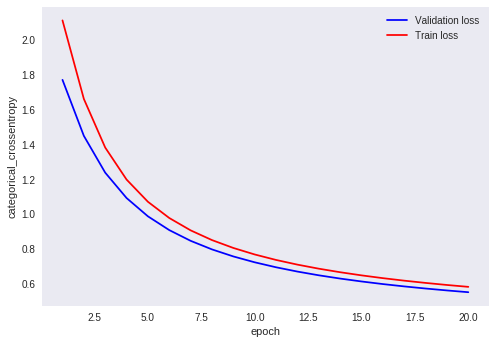

In [15]:
model = Sequential()
model.add(Dense(output_dim, input_dim = input_shape, activation = 'softmax'))
model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = number_of_epoch, validation_data = (x_test, y_test))
score = model.evaluate(x_test,y_test, verbose= 0 )
print("Test Score:", score[0])
print("Accuracy:", score[1])
fig,ax = mp.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel("categorical_crossentropy")
x = list(range(1, number_of_epoch+1))
vl = history.history['val_loss']
tl = hostory.history['loss']
dynamic_plot(x,vl,tl,ax)




              MODEL 1 : INPUT(784) - SIGMOID(640) - SIGMOID(320) - SIGMOID(120) - OUTPUT(SOFTMAX(10)) WITH SGD OPTIMIZER

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 640)               502400    
_________________________________________________________________
dense_23 (Dense)             (None, 320)               205120    
_________________________________________________________________
dense_24 (Dense)             (None, 120)               38520     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1210      
Total params: 747,250
Trainable params: 747,250
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 2.3329 - acc: 0.1124 - val_loss: 2.3015 - val_acc: 0.1135
Epoch 2/20
46000/60000 [======================>.......] - ETA: 1s - loss: 2.3011 

60000/60000 [==============================] - 5s 83us/step - loss: 2.3010 - acc: 0.1124 - val_loss: 2.3003 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 2.3001 - acc: 0.1124 - val_loss: 2.2994 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 5s 84us/step - loss: 2.2992 - acc: 0.1124 - val_loss: 2.2987 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 2.2984 - acc: 0.1124 - val_loss: 2.2977 - val_acc: 0.1135
Epoch 6/20
54000/60000 [==========================>...] - ETA: 0s - loss: 2.2977 - acc: 0.1125

60000/60000 [==============================] - 5s 84us/step - loss: 2.2976 - acc: 0.1124 - val_loss: 2.2969 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 2.2968 - acc: 0.1124 - val_loss: 2.2961 - val_acc: 0.1135
Epoch 8/20
60000/60000 [==============================] - 5s 84us/step - loss: 2.2959 - acc: 0.1124 - val_loss: 2.2951 - val_acc: 0.1135
Epoch 9/20
60000/60000 [==============================] - 5s 83us/step - loss: 2.2951 - acc: 0.1124 - val_loss: 2.2942 - val_acc: 0.1135
Epoch 10/20
55000/60000 [==========================>...] - ETA: 0s - loss: 2.2942 - acc: 0.1129

60000/60000 [==============================] - 5s 83us/step - loss: 2.2942 - acc: 0.1124 - val_loss: 2.2934 - val_acc: 0.1135
Epoch 11/20
60000/60000 [==============================] - 5s 83us/step - loss: 2.2934 - acc: 0.1124 - val_loss: 2.2925 - val_acc: 0.1135
Epoch 12/20
60000/60000 [==============================] - 5s 81us/step - loss: 2.2925 - acc: 0.1125 - val_loss: 2.2916 - val_acc: 0.1135
Epoch 13/20
60000/60000 [==============================] - 5s 84us/step - loss: 2.2916 - acc: 0.1125 - val_loss: 2.2908 - val_acc: 0.1135
Epoch 14/20
54000/60000 [==========================>...] - ETA: 0s - loss: 2.2907 - acc: 0.1152

60000/60000 [==============================] - 5s 84us/step - loss: 2.2907 - acc: 0.1153 - val_loss: 2.2897 - val_acc: 0.1135
Epoch 15/20
60000/60000 [==============================] - 5s 84us/step - loss: 2.2898 - acc: 0.1124 - val_loss: 2.2888 - val_acc: 0.1135
Epoch 16/20
60000/60000 [==============================] - 5s 84us/step - loss: 2.2889 - acc: 0.1124 - val_loss: 2.2879 - val_acc: 0.1135
Epoch 17/20
60000/60000 [==============================] - 5s 84us/step - loss: 2.2880 - acc: 0.1139 - val_loss: 2.2870 - val_acc: 0.1135
Epoch 18/20
54000/60000 [==========================>...] - ETA: 0s - loss: 2.2871 - acc: 0.1129

60000/60000 [==============================] - 5s 83us/step - loss: 2.2870 - acc: 0.1125 - val_loss: 2.2861 - val_acc: 0.1135
Epoch 19/20
60000/60000 [==============================] - 5s 83us/step - loss: 2.2861 - acc: 0.1140 - val_loss: 2.2850 - val_acc: 0.1135
Epoch 20/20
10000/10000 [==============================] - 1s 85us/step
Test score: 2.2840435642242434
Test Accuracy: 0.1142


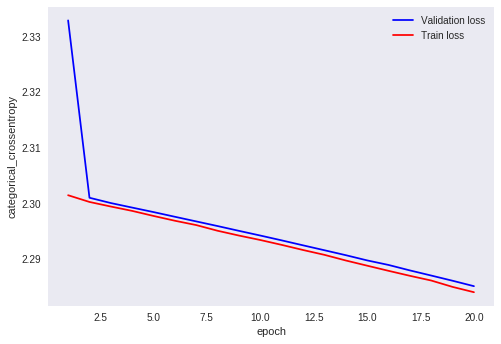

In [22]:
sigmoid_model = Sequential()
sigmoid_model.add(Dense(640, activation = 'sigmoid', input_shape = (input_shape,)))
sigmoid_model.add(Dense(320, activation = 'sigmoid'))
sigmoid_model.add(Dense(120, activation = 'sigmoid'))
sigmoid_model.add(Dense(output_dim, activation  = 'softmax'))
sigmoid_model.summary()
sigmoid_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = sigmoid_model.fit(x_train, y_train, batch_size= batch_size, epochs= number_of_epoch, validation_data=(x_test, y_test))
score = sigmoid_model.evaluate(x_test, y_test)
print("Test score:", score[0])
print("Test Accuracy:", score[1])
fig,ax = mp.subplots(1,1)
ax.set_xlabel("epoch")
ax.set_ylabel("categorical_crossentropy")
x = list(range(1, number_of_epoch+1))
tl = history.history['loss']
vl = history.history['val_loss']
dynamic_plot(x,tl,vl,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,0,'Output layer 1')

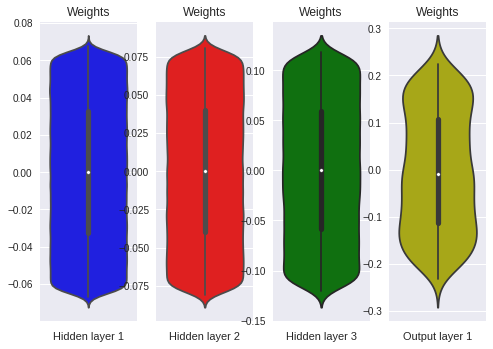

In [28]:
after_weights  = sigmoid_model.get_weights()
h1_w = after_weights[0].flatten().reshape(-1,1)
h2_w = after_weights[2].flatten().reshape(-1,1)
h3_w = after_weights[4].flatten().reshape(-1,1)
out_w = after_weights[6].flatten().reshape(-1,1)
fig = mp.figure()
mp.subplot(1,4,1)
mp.title("Weights")
ax = s.violinplot(y  = h1_w, color='b')
mp.xlabel('Hidden layer 1')
mp.subplot(1,4,2)
mp.title("Weights")
ax = s.violinplot(y  = h2_w, color='r')
mp.xlabel('Hidden layer 2')
mp.subplot(1,4,3)
mp.title("Weights")
ax = s.violinplot(y  = h3_w, color='g')
mp.xlabel('Hidden layer 3')
mp.subplot(1,4,4)
mp.title("Weights")
ax = s.violinplot(y  = out_w, color='y')
mp.xlabel('Output layer 1')

              MODEL 1 WITH ADAM OPTIMIZER

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 640)               502400    
_________________________________________________________________
dense_27 (Dense)             (None, 320)               205120    
_________________________________________________________________
dense_28 (Dense)             (None, 120)               38520     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1210      
Total params: 747,250
Trainable params: 747,250
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 1.5910 - acc: 0.5501 - val_loss: 0.7431 - val_acc: 0.8333
Epoch 2/20
32000/60000 [===============>..............] - ETA: 2s - loss: 0.5845 

60000/60000 [==============================] - 5s 88us/step - loss: 0.5037 - acc: 0.8758 - val_loss: 0.3590 - val_acc: 0.9047
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.3233 - acc: 0.9100 - val_loss: 0.2785 - val_acc: 0.9209
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.2612 - acc: 0.9251 - val_loss: 0.2406 - val_acc: 0.9305
Epoch 5/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.2239 - acc: 0.9351 - val_loss: 0.2070 - val_acc: 0.9392
Epoch 6/20
52000/60000 [=========================>....] - ETA: 0s - loss: 0.1949 - acc: 0.9439

60000/60000 [==============================] - 5s 86us/step - loss: 0.1946 - acc: 0.9439 - val_loss: 0.1908 - val_acc: 0.9421
Epoch 7/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1715 - acc: 0.9506 - val_loss: 0.1707 - val_acc: 0.9495
Epoch 8/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1557 - acc: 0.9547 - val_loss: 0.1538 - val_acc: 0.9543
Epoch 9/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1371 - acc: 0.9601 - val_loss: 0.1420 - val_acc: 0.9570
Epoch 10/20
55000/60000 [==========================>...] - ETA: 0s - loss: 0.1248 - acc: 0.9638

60000/60000 [==============================] - 5s 89us/step - loss: 0.1248 - acc: 0.9638 - val_loss: 0.1355 - val_acc: 0.9599
Epoch 11/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1121 - acc: 0.9676 - val_loss: 0.1258 - val_acc: 0.9625
Epoch 12/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1019 - acc: 0.9710 - val_loss: 0.1160 - val_acc: 0.9649
Epoch 13/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0924 - acc: 0.9739 - val_loss: 0.1103 - val_acc: 0.9668
Epoch 14/20
54000/60000 [==========================>...] - ETA: 0s - loss: 0.0863 - acc: 0.9753

60000/60000 [==============================] - 5s 86us/step - loss: 0.0860 - acc: 0.9754 - val_loss: 0.1118 - val_acc: 0.9656
Epoch 15/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0769 - acc: 0.9783 - val_loss: 0.1016 - val_acc: 0.9700
Epoch 16/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0695 - acc: 0.9803 - val_loss: 0.0936 - val_acc: 0.9705
Epoch 17/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0629 - acc: 0.9826 - val_loss: 0.0909 - val_acc: 0.9724
Epoch 18/20
54000/60000 [==========================>...] - ETA: 0s - loss: 0.0570 - acc: 0.9842

60000/60000 [==============================] - 5s 87us/step - loss: 0.0574 - acc: 0.9840 - val_loss: 0.0885 - val_acc: 0.9735
Epoch 19/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0534 - acc: 0.9842 - val_loss: 0.0845 - val_acc: 0.9749
Epoch 20/20
10000/10000 [==============================] - 1s 88us/step
Test score: 0.08319248105995357
Test Accuracy: 0.9739


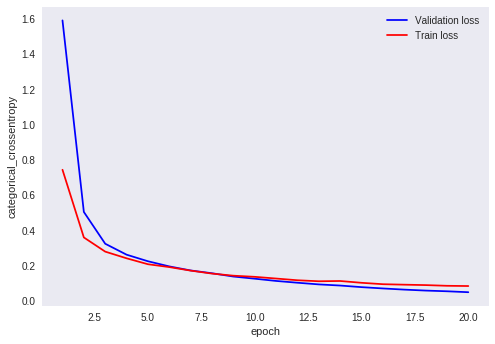

In [29]:
sigmoid_model = Sequential()
sigmoid_model.add(Dense(640, activation = 'sigmoid', input_shape = (input_shape,)))
sigmoid_model.add(Dense(320, activation = 'sigmoid'))
sigmoid_model.add(Dense(120, activation = 'sigmoid'))
sigmoid_model.add(Dense(output_dim, activation  = 'softmax'))
sigmoid_model.summary()
sigmoid_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = sigmoid_model.fit(x_train, y_train, batch_size= batch_size, epochs= number_of_epoch, validation_data=(x_test, y_test))
score = sigmoid_model.evaluate(x_test, y_test)
print("Test score:", score[0])
print("Test Accuracy:", score[1])
fig,ax = mp.subplots(1,1)
ax.set_xlabel("epoch")
ax.set_ylabel("categorical_crossentropy")
x = list(range(1, number_of_epoch+1))
tl = history.history['loss']
vl = history.history['val_loss']
dynamic_plot(x,tl,vl,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,0,'Output layer 1')

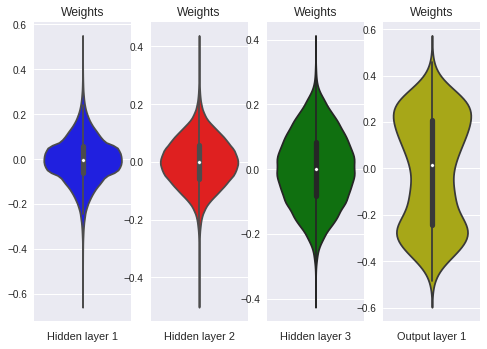

In [30]:
after_weights  = sigmoid_model.get_weights()
h1_w = after_weights[0].flatten().reshape(-1,1)
h2_w = after_weights[2].flatten().reshape(-1,1)
h3_w = after_weights[4].flatten().reshape(-1,1)
out_w = after_weights[6].flatten().reshape(-1,1)
fig = mp.figure()
mp.subplot(1,4,1)
mp.title("Weights")
ax = s.violinplot(y  = h1_w, color='b')
mp.xlabel('Hidden layer 1')
mp.subplot(1,4,2)
mp.title("Weights")
ax = s.violinplot(y  = h2_w, color='r')
mp.xlabel('Hidden layer 2')
mp.subplot(1,4,3)
mp.title("Weights")
ax = s.violinplot(y  = h3_w, color='g')
mp.xlabel('Hidden layer 3')
mp.subplot(1,4,4)
mp.title("Weights")
ax = s.violinplot(y  = out_w, color='y')
mp.xlabel('Output layer 1')

       MODEL 2 : INPUT(784) - RELU(400) - RELU(300) - RELU(200) - RELU(100) - RELU(50) -  OUTPUT(SOFTMAX(10)) WITH SGD OPTIMIZER

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_37 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_38 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_39 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_40 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                510       
Total params: 520,160
Trainable params: 520,160
Non-trainable params: 0
_________________________________________________________________
Trai

60000/60000 [==============================] - 4s 65us/step - loss: 2.1221 - acc: 0.3541 - val_loss: 1.9996 - val_acc: 0.4645
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 1.8404 - acc: 0.5272 - val_loss: 1.6208 - val_acc: 0.6093
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 1.4216 - acc: 0.6635 - val_loss: 1.1830 - val_acc: 0.7193
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 1.0470 - acc: 0.7372 - val_loss: 0.8876 - val_acc: 0.7725
Epoch 6/20
52000/60000 [=========================>....] - ETA: 0s - loss: 0.8296 - acc: 0.7818

60000/60000 [==============================] - 4s 67us/step - loss: 0.8211 - acc: 0.7838 - val_loss: 0.7202 - val_acc: 0.8188
Epoch 7/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.6864 - acc: 0.8180 - val_loss: 0.6131 - val_acc: 0.8403
Epoch 8/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.5975 - acc: 0.8404 - val_loss: 0.5393 - val_acc: 0.8584
Epoch 9/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.5327 - acc: 0.8571 - val_loss: 0.4838 - val_acc: 0.8737
Epoch 10/20
55000/60000 [==========================>...] - ETA: 0s - loss: 0.4866 - acc: 0.8689

60000/60000 [==============================] - 4s 66us/step - loss: 0.4837 - acc: 0.8701 - val_loss: 0.4418 - val_acc: 0.8812
Epoch 11/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.4461 - acc: 0.8789 - val_loss: 0.4117 - val_acc: 0.8875
Epoch 12/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.4167 - acc: 0.8861 - val_loss: 0.3867 - val_acc: 0.8917
Epoch 13/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.3932 - acc: 0.8921 - val_loss: 0.3696 - val_acc: 0.8978
Epoch 14/20
53000/60000 [=========================>....] - ETA: 0s - loss: 0.3778 - acc: 0.8956

60000/60000 [==============================] - 4s 68us/step - loss: 0.3740 - acc: 0.8968 - val_loss: 0.3505 - val_acc: 0.9021
Epoch 15/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3584 - acc: 0.8999 - val_loss: 0.3376 - val_acc: 0.9054
Epoch 16/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3443 - acc: 0.9042 - val_loss: 0.3249 - val_acc: 0.9086
Epoch 17/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.3322 - acc: 0.9070 - val_loss: 0.3150 - val_acc: 0.9110
Epoch 18/20
51000/60000 [========================>.....] - ETA: 0s - loss: 0.3216 - acc: 0.9104

60000/60000 [==============================] - 4s 67us/step - loss: 0.3215 - acc: 0.9097 - val_loss: 0.3062 - val_acc: 0.9126
Epoch 19/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3122 - acc: 0.9118 - val_loss: 0.2976 - val_acc: 0.9160
Epoch 20/20
10000/10000 [==============================] - 1s 81us/step
Test score: 0.2917701820760965
Test Accuracy: 0.9172


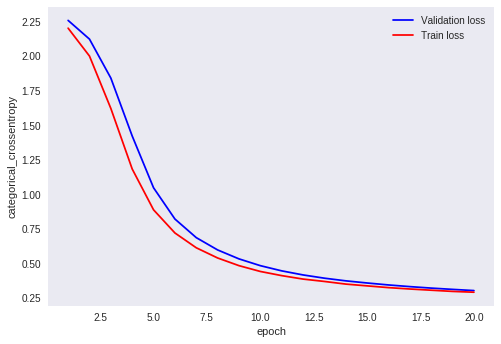

In [32]:
relu_model = Sequential()
relu_model.add(Dense(400, activation = 'relu', input_shape = (input_shape,)))
relu_model.add(Dense(300, activation = 'relu'))
relu_model.add(Dense(200, activation = 'relu'))
relu_model.add(Dense(100, activation = 'relu'))
relu_model.add(Dense(50, activation = 'relu'))
relu_model.add(Dense(output_dim, activation  = 'softmax'))
relu_model.summary()
relu_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = relu_model.fit(x_train, y_train, batch_size= batch_size, epochs= number_of_epoch, validation_data=(x_test, y_test))
score = relu_model.evaluate(x_test, y_test)
print("Test score:", score[0])
print("Test Accuracy:", score[1])
fig,ax = mp.subplots(1,1)
ax.set_xlabel("epoch")
ax.set_ylabel("categorical_crossentropy")
x = list(range(1, number_of_epoch+1))
tl = history.history['loss']
vl = history.history['val_loss']
dynamic_plot(x,tl,vl,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,0,'Output layer 1')

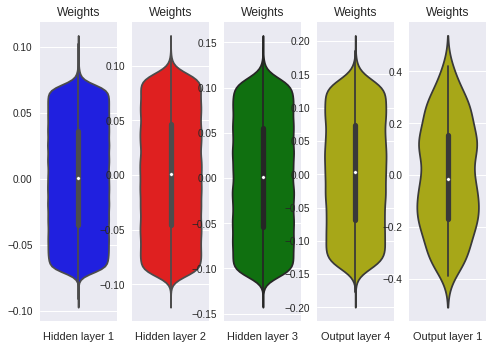

In [38]:
after_weights  = relu_model.get_weights()
h1_w = after_weights[0].flatten().reshape(-1,1)
h2_w = after_weights[2].flatten().reshape(-1,1)
h3_w = after_weights[4].flatten().reshape(-1,1)
h4_w = after_weights[6].flatten().reshape(-1,1)
out_w = after_weights[10].flatten().reshape(-1,1)
fig = mp.figure()
mp.subplot(1,5,1)
mp.title("Weights")
ax = s.violinplot(y  = h1_w, color='b')
mp.xlabel('Hidden layer 1')
mp.subplot(1,5,2)
mp.title("Weights")
ax = s.violinplot(y  = h2_w, color='r')
mp.xlabel('Hidden layer 2')
mp.subplot(1,5,3)
mp.title("Weights")
ax = s.violinplot(y  = h3_w, color='g')
mp.xlabel('Hidden layer 3')
mp.subplot(1,5,4)
mp.title("Weights")
ax = s.violinplot(y  = h4_w, color='y')
mp.xlabel('Output layer 4')
mp.subplot(1,5,5)
mp.title("Weights")
ax = s.violinplot(y  = out_w, color='y')
mp.xlabel('Output layer 1')

              MODEL 2 WITH ADAM OPTIMIZER

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_43 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_44 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_46 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                510       
Total params: 520,160
Trainable params: 520,160
Non-trainable params: 0
_________________________________________________________________
Trai

60000/60000 [==============================] - 4s 68us/step - loss: 0.1605 - acc: 0.9523 - val_loss: 0.1235 - val_acc: 0.9629
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1075 - acc: 0.9684 - val_loss: 0.0986 - val_acc: 0.9695
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0775 - acc: 0.9766 - val_loss: 0.0958 - val_acc: 0.9699
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0631 - acc: 0.9812 - val_loss: 0.0824 - val_acc: 0.9745
Epoch 6/20
45000/60000 [=====================>........] - ETA: 0s - loss: 0.0429 - acc: 0.9872

60000/60000 [==============================] - 4s 70us/step - loss: 0.0451 - acc: 0.9863 - val_loss: 0.0867 - val_acc: 0.9731
Epoch 7/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0349 - acc: 0.9900 - val_loss: 0.0960 - val_acc: 0.9699
Epoch 8/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0263 - acc: 0.9924 - val_loss: 0.0657 - val_acc: 0.9796
Epoch 9/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0181 - acc: 0.9947 - val_loss: 0.0729 - val_acc: 0.9798
Epoch 10/20
45000/60000 [=====================>........] - ETA: 1s - loss: 0.0152 - acc: 0.9959

60000/60000 [==============================] - 4s 71us/step - loss: 0.0154 - acc: 0.9957 - val_loss: 0.0701 - val_acc: 0.9791
Epoch 11/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0131 - acc: 0.9960 - val_loss: 0.0704 - val_acc: 0.9802
Epoch 12/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0086 - acc: 0.9976 - val_loss: 0.0742 - val_acc: 0.9796
Epoch 13/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0057 - acc: 0.9987 - val_loss: 0.0752 - val_acc: 0.9826
Epoch 14/20
40000/60000 [===================>..........] - ETA: 1s - loss: 0.0047 - acc: 0.9988

60000/60000 [==============================] - 4s 70us/step - loss: 0.0053 - acc: 0.9986 - val_loss: 0.0775 - val_acc: 0.9810
Epoch 15/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0102 - acc: 0.9969 - val_loss: 0.0755 - val_acc: 0.9821
Epoch 16/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0097 - acc: 0.9970 - val_loss: 0.0802 - val_acc: 0.9793
Epoch 17/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0063 - acc: 0.9979 - val_loss: 0.0887 - val_acc: 0.9802
Epoch 18/20
41000/60000 [===================>..........] - ETA: 1s - loss: 0.0049 - acc: 0.9986

60000/60000 [==============================] - 4s 70us/step - loss: 0.0050 - acc: 0.9985 - val_loss: 0.0940 - val_acc: 0.9794
Epoch 19/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.0773 - val_acc: 0.9827
Epoch 20/20
10000/10000 [==============================] - 1s 80us/step
Test score: 0.08630873851410388
Test Accuracy: 0.9804


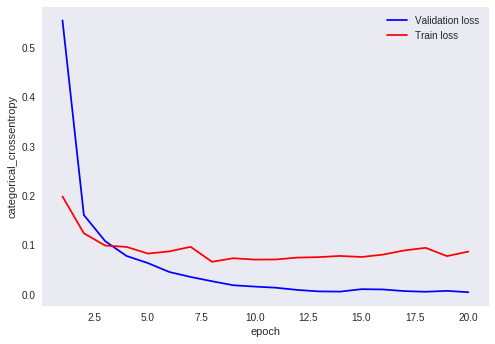

In [39]:
relu_model = Sequential()
relu_model.add(Dense(400, activation = 'relu', input_shape = (input_shape,)))
relu_model.add(Dense(300, activation = 'relu'))
relu_model.add(Dense(200, activation = 'relu'))
relu_model.add(Dense(100, activation = 'relu'))
relu_model.add(Dense(50, activation = 'relu'))
relu_model.add(Dense(output_dim, activation  = 'softmax'))
relu_model.summary()
relu_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = relu_model.fit(x_train, y_train, batch_size= batch_size, epochs= number_of_epoch, validation_data=(x_test, y_test))
score = relu_model.evaluate(x_test, y_test)
print("Test score:", score[0])
print("Test Accuracy:", score[1])
fig,ax = mp.subplots(1,1)
ax.set_xlabel("epoch")
ax.set_ylabel("categorical_crossentropy")
x = list(range(1, number_of_epoch+1))
tl = history.history['loss']
vl = history.history['val_loss']
dynamic_plot(x,tl,vl,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,0,'Output layer 1')

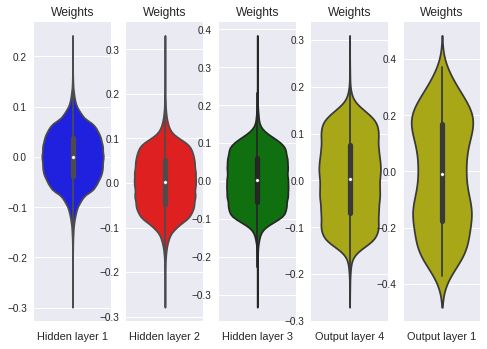

In [40]:
after_weights  = relu_model.get_weights()
h1_w = after_weights[0].flatten().reshape(-1,1)
h2_w = after_weights[2].flatten().reshape(-1,1)
h3_w = after_weights[4].flatten().reshape(-1,1)
h4_w = after_weights[6].flatten().reshape(-1,1)
out_w = after_weights[10].flatten().reshape(-1,1)
fig = mp.figure()
mp.subplot(1,5,1)
mp.title("Weights")
ax = s.violinplot(y  = h1_w, color='b')
mp.xlabel('Hidden layer 1')
mp.subplot(1,5,2)
mp.title("Weights")
ax = s.violinplot(y  = h2_w, color='r')
mp.xlabel('Hidden layer 2')
mp.subplot(1,5,3)
mp.title("Weights")
ax = s.violinplot(y  = h3_w, color='g')
mp.xlabel('Hidden layer 3')
mp.subplot(1,5,4)
mp.title("Weights")
ax = s.violinplot(y  = h4_w, color='y')
mp.xlabel('Output layer 4')
mp.subplot(1,5,5)
mp.title("Weights")
ax = s.violinplot(y  = out_w, color='y')
mp.xlabel('Output layer 1')

              MODEL 3: INPUT(784) - SIGMOID(160) - SIGMOID(80) - SIGMOID(40) -   
                                  OUTPUT(SOFTMAX(10)) WITH SGD OPTIMIZER + BATCH NORMALIZATION ON HIDDEN LAYERS
                                  
                                  -> Uniform Initialization of weights for Sigmoid Activation Functions

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 160)               125600    
_________________________________________________________________
batch_normalization_1 (Batch (None, 160)               640       
_________________________________________________________________
dense_49 (Dense)             (None, 80)                12880     
_________________________________________________________________
batch_normalization_2 (Batch (None, 80)                320       
_________________________________________________________________
dense_50 (Dense)             (None, 40)                3240      
_________________________________________________________________
batch_normalization_3 (Batch (None, 40)                160       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                410       
Total para

60000/60000 [==============================] - 2s 38us/step - loss: 0.2939 - acc: 0.9183 - val_loss: 0.4073 - val_acc: 0.8800
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.2787 - acc: 0.9218 - val_loss: 0.4644 - val_acc: 0.8578
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2645 - acc: 0.9253 - val_loss: 0.4265 - val_acc: 0.8703
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2523 - acc: 0.9290 - val_loss: 0.5447 - val_acc: 0.8255
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2349 - acc: 0.9339 - val_loss: 0.6936 - val_acc: 0.7750
Epoch 8/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2165 - acc: 0.9379 - val_loss: 0.6534 - val_acc: 0.7799
Epoch 9/20
33000/60000 [===============>..............] - ETA: 0s - loss: 0.1940 - acc: 0.9428

60000/60000 [==============================] - 2s 37us/step - loss: 0.1909 - acc: 0.9445 - val_loss: 0.6887 - val_acc: 0.7607
Epoch 10/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1658 - acc: 0.9517 - val_loss: 0.5620 - val_acc: 0.7912
Epoch 11/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1440 - acc: 0.9579 - val_loss: 0.5247 - val_acc: 0.8170
Epoch 12/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1243 - acc: 0.9629 - val_loss: 0.3735 - val_acc: 0.8604
Epoch 13/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1101 - acc: 0.9664 - val_loss: 0.3507 - val_acc: 0.8663
Epoch 14/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0961 - acc: 0.9708 - val_loss: 0.1877 - val_acc: 0.9455
Epoch 15/20
39000/60000 [==================>...........] - ETA: 0s - loss: 0.0842 - acc: 0.9744

60000/60000 [==============================] - 2s 38us/step - loss: 0.0859 - acc: 0.9736 - val_loss: 0.1659 - val_acc: 0.9507
Epoch 16/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0772 - acc: 0.9766 - val_loss: 0.1634 - val_acc: 0.9521
Epoch 17/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0689 - acc: 0.9791 - val_loss: 0.1392 - val_acc: 0.9559
Epoch 18/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0621 - acc: 0.9807 - val_loss: 0.1051 - val_acc: 0.9672
Epoch 19/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0566 - acc: 0.9826 - val_loss: 0.1138 - val_acc: 0.9647
Epoch 20/20
10000/10000 [==============================] - 1s 59us/step
Test score: 0.09823569706063717
Test Accuracy: 0.9694


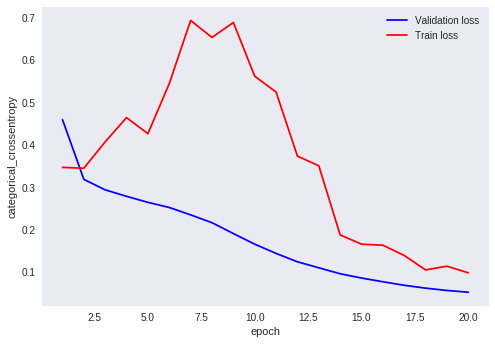

In [41]:
from keras.layers.normalization import BatchNormalization
batch_model = Sequential()
batch_model.add(Dense(160, activation = 'sigmoid', input_shape = (input_shape,), kernel_initializer= RandomNormal(mean = 0, stddev= 0.00625, seed= None)))
batch_model.add(BatchNormalization())
batch_model.add(Dense(80, activation = 'sigmoid', kernel_initializer= RandomNormal(mean = 0, stddev= 0.0125, seed = None)))
batch_model.add(BatchNormalization())
batch_model.add(Dense(40, activation = 'sigmoid', kernel_initializer= RandomNormal(mean = 0, stddev= 0.025, seed = None)))
batch_model.add(BatchNormalization())
batch_model.add(Dense(output_dim, activation  = 'softmax'))
batch_model.summary()
batch_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = batch_model.fit(x_train, y_train, batch_size= batch_size, epochs= number_of_epoch, validation_data=(x_test, y_test))
score = batch_model.evaluate(x_test, y_test)
print("Test score:", score[0])
print("Test Accuracy:", score[1])
fig,ax = mp.subplots(1,1)
ax.set_xlabel("epoch")
ax.set_ylabel("categorical_crossentropy")
x = list(range(1, number_of_epoch+1))
tl = history.history['loss']
vl = history.history['val_loss']
dynamic_plot(x,tl,vl,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,0,'Output layer 1')

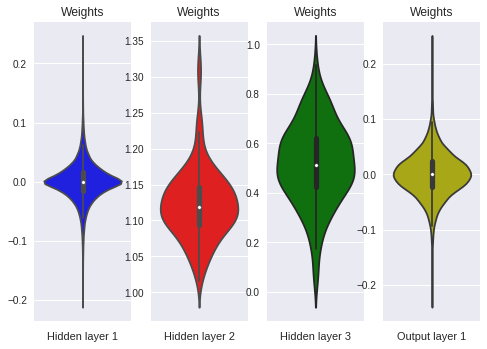

In [44]:
after_weights  = batch_model.get_weights()
h1_w = after_weights[0].flatten().reshape(-1,1)
h2_w = after_weights[2].flatten().reshape(-1,1)
h3_w = after_weights[4].flatten().reshape(-1,1)
out_w = after_weights[6].flatten().reshape(-1,1)
fig = mp.figure()
mp.subplot(1,4,1)
mp.title("Weights")
ax = s.violinplot(y  = h1_w, color='b')
mp.xlabel('Hidden layer 1')
mp.subplot(1,4,2)
mp.title("Weights")
ax = s.violinplot(y  = h2_w, color='r')
mp.xlabel('Hidden layer 2')
mp.subplot(1,4,3)
mp.title("Weights")
ax = s.violinplot(y  = h3_w, color='g')
mp.xlabel('Hidden layer 3')
mp.subplot(1,4,4)
mp.title("Weights")
ax = s.violinplot(y  = out_w, color='y')
mp.xlabel('Output layer 1')

               MODEL 4: INPUT(784) - SIGMOID(160) - SIGMOID(80) - SIGMOID(40) -    
                                  SIGMOID(20) - OUTPUT(SOFTMAX(10)) WITH SGD OPTIMIZER + BATCH 
                                  NORMALIZATION ON HIDDEN LAYERS + DROP OUT(0.5) ON HIDDEN LAYERS

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 160)               125600    
_________________________________________________________________
batch_normalization_4 (Batch (None, 160)               640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 80)                12880     
_________________________________________________________________
batch_normalization_5 (Batch (None, 80)                320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 40)                3240      
__________

60000/60000 [==============================] - 3s 44us/step - loss: 1.0099 - acc: 0.6813 - val_loss: 0.4070 - val_acc: 0.8903
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.9032 - acc: 0.7149 - val_loss: 0.3644 - val_acc: 0.8959
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.8376 - acc: 0.7378 - val_loss: 0.3530 - val_acc: 0.8988
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.7896 - acc: 0.7554 - val_loss: 0.3362 - val_acc: 0.9028
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.7485 - acc: 0.7673 - val_loss: 0.3400 - val_acc: 0.8980
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.7243 - acc: 0.7767 - val_loss: 0.3280 - val_acc: 0.9018
Epoch 8/20
36000/60000 [=================>............] - ETA: 1s - loss: 0.7042 - acc: 0.7848

60000/60000 [==============================] - 3s 44us/step - loss: 0.6993 - acc: 0.7867 - val_loss: 0.3267 - val_acc: 0.9044
Epoch 9/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.6753 - acc: 0.7961 - val_loss: 0.3304 - val_acc: 0.9024
Epoch 10/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.6567 - acc: 0.8040 - val_loss: 0.3332 - val_acc: 0.9008
Epoch 11/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.6424 - acc: 0.8112 - val_loss: 0.3261 - val_acc: 0.9058
Epoch 12/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.6224 - acc: 0.8165 - val_loss: 0.3173 - val_acc: 0.9056
Epoch 13/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.6076 - acc: 0.8219 - val_loss: 0.3150 - val_acc: 0.9079
Epoch 14/20
37000/60000 [=================>............] - ETA: 0s - loss: 0.5975 - acc: 0.8282

60000/60000 [==============================] - 3s 45us/step - loss: 0.5911 - acc: 0.8295 - val_loss: 0.2975 - val_acc: 0.9144
Epoch 15/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.5868 - acc: 0.8317 - val_loss: 0.2917 - val_acc: 0.9155
Epoch 16/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.5715 - acc: 0.8366 - val_loss: 0.2968 - val_acc: 0.9130
Epoch 17/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.5528 - acc: 0.8439 - val_loss: 0.2824 - val_acc: 0.9167
Epoch 18/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.5419 - acc: 0.8480 - val_loss: 0.2748 - val_acc: 0.9193
Epoch 19/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.5294 - acc: 0.8530 - val_loss: 0.2794 - val_acc: 0.9198
Epoch 20/20
33000/60000 [===============>..............] - ETA: 1s - loss: 0.5187 - acc: 0.8570

10000/10000 [==============================] - 1s 62us/step
Test score: 0.2770418862953782
Test Accuracy: 0.9193


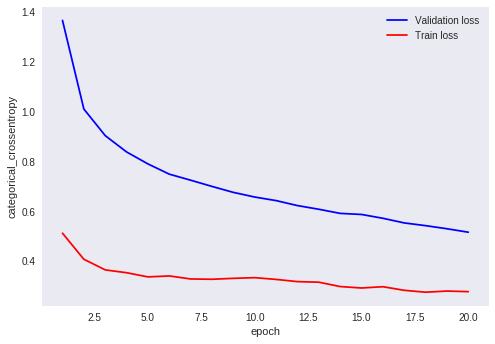

In [47]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
drop_model = Sequential()
drop_model.add(Dense(160, activation = 'sigmoid', input_shape = (input_shape,), kernel_initializer= RandomNormal(mean = 0, stddev= 0.00625, seed= None)))
drop_model.add(BatchNormalization())
drop_model.add(Dropout(0.5))
drop_model.add(Dense(80, activation = 'sigmoid', kernel_initializer= RandomNormal(mean = 0, stddev= 0.0125, seed = None)))
drop_model.add(BatchNormalization())
drop_model.add(Dropout(0.5))
drop_model.add(Dense(40, activation = 'sigmoid', kernel_initializer= RandomNormal(mean = 0, stddev= 0.025, seed = None)))
drop_model.add(BatchNormalization())
drop_model.add(Dropout(0.5))
drop_model.add(Dense(20, activation = 'sigmoid', kernel_initializer= RandomNormal(mean = 0, stddev= 0.05, seed = None)))
drop_model.add(BatchNormalization())
drop_model.add(Dropout(0.5))
drop_model.add(Dense(output_dim, activation  = 'softmax'))
drop_model.summary()
drop_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = drop_model.fit(x_train, y_train, batch_size= batch_size, epochs= number_of_epoch, validation_data=(x_test, y_test))
score = drop_model.evaluate(x_test, y_test)
print("Test score:", score[0])
print("Test Accuracy:", score[1])
fig,ax = mp.subplots(1,1)
ax.set_xlabel("epoch")
ax.set_ylabel("categorical_crossentropy")
x = list(range(1, number_of_epoch+1))
tl = history.history['loss']
vl = history.history['val_loss']
dynamic_plot(x,tl,vl,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,0,'Output layer')

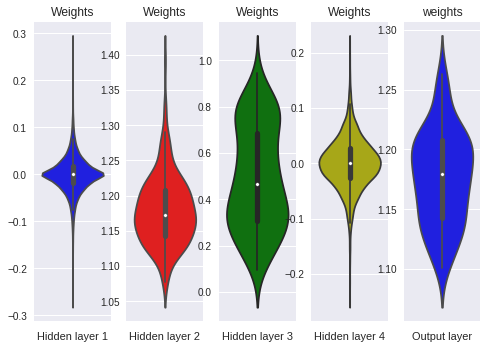

In [48]:
after_weights  = drop_model.get_weights()
h1_w = after_weights[0].flatten().reshape(-1,1)
h2_w = after_weights[2].flatten().reshape(-1,1)
h3_w = after_weights[4].flatten().reshape(-1,1)
h4_w = after_weights[6].flatten().reshape(-1,1)
out_w = after_weights[8].flatten().reshape(-1,1)
fig = mp.figure()
mp.subplot(1,5,1)
mp.title("Weights")
ax = s.violinplot(y  = h1_w, color='b')
mp.xlabel('Hidden layer 1')
mp.subplot(1,5,2)
mp.title("Weights")
ax = s.violinplot(y  = h2_w, color='r')
mp.xlabel('Hidden layer 2')
mp.subplot(1,5,3)
mp.title("Weights")
ax = s.violinplot(y  = h3_w, color='g')
mp.xlabel('Hidden layer 3')
mp.subplot(1,5,4)
mp.title("Weights")
ax = s.violinplot(y  = h4_w, color='y')
mp.xlabel('Hidden layer 4')
mp.subplot(1,5,5)
mp.title('weights')
ax = s.violinplot(y = out_w, color = 'b')
mp.xlabel('Output layer')

              HYPER PARAMETER TUNING FOR KERAS USING SCIKIT-LEARN

In [0]:
from keras.optimizers import adagrad, rmsprop, sgd, adadelta, adam
def hyperparameter_tune(activ):
  model = Sequential()
  model.add(Dense(640, activation=activ, input_shape = (input_shape,)))
  model.add(Dense(320, activation = activ))
  model.add(Dense(80, activation  = activ))
  model.add(Dense(10, activation = 'softmax'))
  
  model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
  return model

In [57]:



from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
activ = ['sigmoid', 'relu']
model = KerasClassifier(build_fn = hyperparameter_tune, epochs = number_of_epoch, batch_size = batch_size)
param_grid = dict(activ = activ)
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid_result = grid.fit(x_train, y_train)

Epoch 1/20
40000/40000 [==============================] - 4s 88us/step - loss: 2.3534 - acc: 0.0987
Epoch 2/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.3034 - acc: 0.1174
Epoch 3/20
40000/40000 [==============================] - 3s 76us/step - loss: 2.3003 - acc: 0.1115
Epoch 4/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2995 - acc: 0.1115
Epoch 5/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2989 - acc: 0.1115
Epoch 6/20
40000/40000 [==============================] - 3s 79us/step - loss: 2.2983 - acc: 0.1115
Epoch 7/20
22000/40000 [===============>..............] - ETA: 1s - loss: 2.2979 - acc: 0.1103

40000/40000 [==============================] - 3s 79us/step - loss: 2.2977 - acc: 0.1115
Epoch 8/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2971 - acc: 0.1115
Epoch 9/20
40000/40000 [==============================] - 3s 79us/step - loss: 2.2965 - acc: 0.1115
Epoch 10/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2959 - acc: 0.1115
Epoch 11/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2953 - acc: 0.1115
Epoch 12/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2947 - acc: 0.1115
Epoch 13/20
28000/40000 [====================>.........] - ETA: 0s - loss: 2.2942 - acc: 0.1112

40000/40000 [==============================] - 3s 79us/step - loss: 2.2940 - acc: 0.1115
Epoch 14/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2935 - acc: 0.1115
Epoch 15/20
40000/40000 [==============================] - 3s 75us/step - loss: 2.2928 - acc: 0.1115
Epoch 16/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2922 - acc: 0.1115
Epoch 17/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2916 - acc: 0.1115
Epoch 18/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2909 - acc: 0.1115
Epoch 19/20
28000/40000 [====================>.........] - ETA: 0s - loss: 2.2902 - acc: 0.1126

40000/40000 [==============================] - 3s 78us/step - loss: 2.2903 - acc: 0.1115
Epoch 20/20
40000/40000 [==============================] - 1s 33us/step
Epoch 1/20
40000/40000 [==============================] - 4s 91us/step - loss: 2.4100 - acc: 0.0804
Epoch 2/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.3120 - acc: 0.0912
Epoch 3/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.3021 - acc: 0.0973
Epoch 4/20
28000/40000 [====================>.........] - ETA: 0s - loss: 2.3008 - acc: 0.1114

40000/40000 [==============================] - 3s 77us/step - loss: 2.3007 - acc: 0.1115
Epoch 5/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.3001 - acc: 0.1115
Epoch 6/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2996 - acc: 0.1115
Epoch 7/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2990 - acc: 0.1115
Epoch 8/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2985 - acc: 0.1117
Epoch 9/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2980 - acc: 0.1115
Epoch 10/20
29000/40000 [====================>.........] - ETA: 0s - loss: 2.2977 - acc: 0.1106

40000/40000 [==============================] - 3s 78us/step - loss: 2.2975 - acc: 0.1115
Epoch 11/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2970 - acc: 0.1115
Epoch 12/20
40000/40000 [==============================] - 3s 76us/step - loss: 2.2965 - acc: 0.1115
Epoch 13/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2960 - acc: 0.1115
Epoch 14/20
40000/40000 [==============================] - 3s 76us/step - loss: 2.2955 - acc: 0.1116
Epoch 15/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2950 - acc: 0.1115
Epoch 16/20
28000/40000 [====================>.........] - ETA: 0s - loss: 2.2943 - acc: 0.1128

40000/40000 [==============================] - 3s 76us/step - loss: 2.2944 - acc: 0.1115
Epoch 17/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2939 - acc: 0.1117
Epoch 18/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2934 - acc: 0.1115
Epoch 19/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2929 - acc: 0.1118
Epoch 20/20
40000/40000 [==============================] - 1s 33us/step
Epoch 1/20
34000/40000 [========================>.....] - ETA: 0s - loss: 2.3532 - acc: 0.1122

40000/40000 [==============================] - 4s 93us/step - loss: 2.3473 - acc: 0.1130
Epoch 2/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.3039 - acc: 0.1141
Epoch 3/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2988 - acc: 0.1141
Epoch 4/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2978 - acc: 0.1141
Epoch 5/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2972 - acc: 0.1141
Epoch 6/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2966 - acc: 0.1141
Epoch 7/20
30000/40000 [=====================>........] - ETA: 0s - loss: 2.2962 - acc: 0.1138

40000/40000 [==============================] - 3s 76us/step - loss: 2.2960 - acc: 0.1141
Epoch 8/20
40000/40000 [==============================] - 3s 74us/step - loss: 2.2954 - acc: 0.1141
Epoch 9/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2948 - acc: 0.1141
Epoch 10/20
40000/40000 [==============================] - 3s 76us/step - loss: 2.2942 - acc: 0.1141
Epoch 11/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2936 - acc: 0.1141
Epoch 12/20
40000/40000 [==============================] - 3s 78us/step - loss: 2.2930 - acc: 0.1141
Epoch 13/20
29000/40000 [====================>.........] - ETA: 0s - loss: 2.2928 - acc: 0.1122

40000/40000 [==============================] - 3s 77us/step - loss: 2.2924 - acc: 0.1141
Epoch 14/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2918 - acc: 0.1141
Epoch 15/20
40000/40000 [==============================] - 3s 76us/step - loss: 2.2911 - acc: 0.1141
Epoch 16/20
40000/40000 [==============================] - 3s 76us/step - loss: 2.2905 - acc: 0.1141
Epoch 17/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2899 - acc: 0.1141
Epoch 18/20
40000/40000 [==============================] - 3s 77us/step - loss: 2.2893 - acc: 0.1141
Epoch 19/20
28000/40000 [====================>.........] - ETA: 0s - loss: 2.2890 - acc: 0.1135

40000/40000 [==============================] - 3s 76us/step - loss: 2.2886 - acc: 0.1141
Epoch 20/20
40000/40000 [==============================] - 1s 32us/step
Epoch 1/20
40000/40000 [==============================] - 4s 96us/step - loss: 2.1997 - acc: 0.2195
Epoch 2/20
40000/40000 [==============================] - 3s 76us/step - loss: 1.9482 - acc: 0.5110
Epoch 3/20
40000/40000 [==============================] - 3s 77us/step - loss: 1.6651 - acc: 0.6676
Epoch 4/20
27000/40000 [===================>..........] - ETA: 1s - loss: 1.4148 - acc: 0.7393

40000/40000 [==============================] - 3s 78us/step - loss: 1.3664 - acc: 0.7502
Epoch 5/20
40000/40000 [==============================] - 3s 78us/step - loss: 1.1043 - acc: 0.7968
Epoch 6/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.9096 - acc: 0.8215
Epoch 7/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.7747 - acc: 0.8374
Epoch 8/20
40000/40000 [==============================] - 3s 77us/step - loss: 0.6802 - acc: 0.8490
Epoch 9/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.6119 - acc: 0.8570
Epoch 10/20
29000/40000 [====================>.........] - ETA: 0s - loss: 0.5672 - acc: 0.8638

40000/40000 [==============================] - 3s 79us/step - loss: 0.5610 - acc: 0.8645
Epoch 11/20
40000/40000 [==============================] - 3s 80us/step - loss: 0.5214 - acc: 0.8711
Epoch 12/20
40000/40000 [==============================] - 3s 79us/step - loss: 0.4898 - acc: 0.8769
Epoch 13/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.4640 - acc: 0.8806
Epoch 14/20
40000/40000 [==============================] - 3s 79us/step - loss: 0.4426 - acc: 0.8851
Epoch 15/20
40000/40000 [==============================] - 3s 79us/step - loss: 0.4245 - acc: 0.8883
Epoch 16/20
28000/40000 [====================>.........] - ETA: 0s - loss: 0.4144 - acc: 0.8900

40000/40000 [==============================] - 3s 78us/step - loss: 0.4090 - acc: 0.8919
Epoch 17/20
40000/40000 [==============================] - 3s 79us/step - loss: 0.3956 - acc: 0.8947
Epoch 18/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.3837 - acc: 0.8974
Epoch 19/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.3734 - acc: 0.8990
Epoch 20/20
40000/40000 [==============================] - 1s 33us/step
Epoch 1/20
34000/40000 [========================>.....] - ETA: 0s - loss: 2.2243 - acc: 0.1671

40000/40000 [==============================] - 4s 92us/step - loss: 2.2065 - acc: 0.1884
Epoch 2/20
40000/40000 [==============================] - 3s 76us/step - loss: 1.9649 - acc: 0.5095
Epoch 3/20
40000/40000 [==============================] - 3s 76us/step - loss: 1.6852 - acc: 0.6830
Epoch 4/20
40000/40000 [==============================] - 3s 78us/step - loss: 1.3794 - acc: 0.7558
Epoch 5/20
40000/40000 [==============================] - 3s 76us/step - loss: 1.1024 - acc: 0.7954
Epoch 6/20
40000/40000 [==============================] - 3s 77us/step - loss: 0.8972 - acc: 0.8205
Epoch 7/20
30000/40000 [=====================>........] - ETA: 0s - loss: 0.7686 - acc: 0.8372

40000/40000 [==============================] - 3s 76us/step - loss: 0.7567 - acc: 0.8372
Epoch 8/20
40000/40000 [==============================] - 3s 77us/step - loss: 0.6609 - acc: 0.8490
Epoch 9/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.5932 - acc: 0.8579
Epoch 10/20
40000/40000 [==============================] - 3s 80us/step - loss: 0.5434 - acc: 0.8656
Epoch 11/20
40000/40000 [==============================] - 3s 79us/step - loss: 0.5054 - acc: 0.8719
Epoch 12/20
40000/40000 [==============================] - 3s 80us/step - loss: 0.4756 - acc: 0.8765
Epoch 13/20
29000/40000 [====================>.........] - ETA: 0s - loss: 0.4586 - acc: 0.8793

40000/40000 [==============================] - 3s 80us/step - loss: 0.4515 - acc: 0.8812
Epoch 14/20
40000/40000 [==============================] - 3s 80us/step - loss: 0.4314 - acc: 0.8853
Epoch 15/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.4144 - acc: 0.8886
Epoch 16/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.3999 - acc: 0.8913
Epoch 17/20
40000/40000 [==============================] - 3s 79us/step - loss: 0.3874 - acc: 0.8942
Epoch 18/20
40000/40000 [==============================] - 3s 79us/step - loss: 0.3763 - acc: 0.8967
Epoch 19/20
28000/40000 [====================>.........] - ETA: 0s - loss: 0.3696 - acc: 0.8980

40000/40000 [==============================] - 3s 78us/step - loss: 0.3665 - acc: 0.8993
Epoch 20/20
40000/40000 [==============================] - 1s 32us/step
Epoch 1/20
40000/40000 [==============================] - 4s 96us/step - loss: 2.2087 - acc: 0.3134
Epoch 2/20
40000/40000 [==============================] - 3s 75us/step - loss: 1.9840 - acc: 0.5594
Epoch 3/20
40000/40000 [==============================] - 3s 75us/step - loss: 1.7116 - acc: 0.6780
Epoch 4/20
28000/40000 [====================>.........] - ETA: 0s - loss: 1.4585 - acc: 0.7425

40000/40000 [==============================] - 3s 77us/step - loss: 1.4141 - acc: 0.7510
Epoch 5/20
40000/40000 [==============================] - 3s 77us/step - loss: 1.1410 - acc: 0.7918
Epoch 6/20
40000/40000 [==============================] - 3s 77us/step - loss: 0.9316 - acc: 0.8131
Epoch 7/20
40000/40000 [==============================] - 3s 76us/step - loss: 0.7862 - acc: 0.8299
Epoch 8/20
40000/40000 [==============================] - 3s 75us/step - loss: 0.6862 - acc: 0.8424
Epoch 9/20
40000/40000 [==============================] - 3s 76us/step - loss: 0.6153 - acc: 0.8533
Epoch 10/20
29000/40000 [====================>.........] - ETA: 0s - loss: 0.5647 - acc: 0.8610

40000/40000 [==============================] - 3s 77us/step - loss: 0.5629 - acc: 0.8604
Epoch 11/20
40000/40000 [==============================] - 3s 76us/step - loss: 0.5226 - acc: 0.8691
Epoch 12/20
40000/40000 [==============================] - 3s 77us/step - loss: 0.4910 - acc: 0.8743
Epoch 13/20
40000/40000 [==============================] - 3s 85us/step - loss: 0.4651 - acc: 0.8796
Epoch 14/20
40000/40000 [==============================] - 3s 77us/step - loss: 0.4436 - acc: 0.8838
Epoch 15/20
40000/40000 [==============================] - 3s 79us/step - loss: 0.4256 - acc: 0.8876
Epoch 16/20
28000/40000 [====================>.........] - ETA: 0s - loss: 0.4144 - acc: 0.8892

40000/40000 [==============================] - 3s 79us/step - loss: 0.4101 - acc: 0.8904
Epoch 17/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.3967 - acc: 0.8928
Epoch 18/20
40000/40000 [==============================] - 3s 77us/step - loss: 0.3851 - acc: 0.8953
Epoch 19/20
40000/40000 [==============================] - 3s 78us/step - loss: 0.3746 - acc: 0.8976
Epoch 20/20
40000/40000 [==============================] - 1s 33us/step
Epoch 1/20
32000/60000 [===============>..............] - ETA: 2s - loss: 2.2277 - acc: 0.1985

60000/60000 [==============================] - 5s 90us/step - loss: 2.1401 - acc: 0.3058
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 1.7291 - acc: 0.6136
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 1.2835 - acc: 0.7470
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.9437 - acc: 0.8027
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.7407 - acc: 0.8349
Epoch 6/20
27000/60000 [============>.................] - ETA: 2s - loss: 0.6418 - acc: 0.8518

60000/60000 [==============================] - 5s 77us/step - loss: 0.6196 - acc: 0.8546
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.5426 - acc: 0.8668
Epoch 8/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.4908 - acc: 0.8766
Epoch 9/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.4535 - acc: 0.8837
Epoch 10/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.4255 - acc: 0.8889
Epoch 11/20
26000/60000 [============>.................] - ETA: 2s - loss: 0.4115 - acc: 0.8900

60000/60000 [==============================] - 5s 78us/step - loss: 0.4039 - acc: 0.8926
Epoch 12/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3863 - acc: 0.8961
Epoch 13/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3719 - acc: 0.8989
Epoch 14/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3597 - acc: 0.9013
Epoch 15/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3492 - acc: 0.9040
Epoch 16/20
25000/60000 [===========>..................] - ETA: 2s - loss: 0.3470 - acc: 0.9041

60000/60000 [==============================] - 5s 78us/step - loss: 0.3398 - acc: 0.9059
Epoch 17/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3316 - acc: 0.9080
Epoch 18/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3242 - acc: 0.9093
Epoch 19/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3174 - acc: 0.9115
Epoch 20/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3112 - acc: 0.9127


In [59]:
print("Best %f using %s is:" %(grid_result.best_score_, grid_result.best_params_))
mean = grid_result.cv_results_['mean_test_score']
stdv = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdv, params in zip(mean, stdv, params):
  print("%f %f with %r" %(mean,stdv,params))

Best 0.898233 using {'activ': 'relu'} is:
0.112367 0.002416 with {'activ': 'sigmoid'}
0.898233 0.002429 with {'activ': 'relu'}


             CONCLUSION:
             
                   MODEL 1 : INPUT(784) - SIGMOID(640) - SIGMOID(320) - SIGMOID(120) - OUTPUT(SOFTMAXT(10))
                           
                              SGD : TRAIN LOSS: 2.2851 VALIDATION LOSS: 2.2840 ACCURACY: 11.42
                           
                              ADAM: TRAIN LOSS : 0.0481 VALIDATION LOSS: 0.0832 ACCURACY : 97.39
                           
                   MODEL 2 : INPUT(784) - RELU(400) - RELU(300) - RELU(200) - RELU(100) - RELU(50) - OUTPUT(SOFTMAX(10))
                   
                              SGD: TRAIN LOSS: 0.3036 VALIDATION LOSS: 0.9145 ACCURACY: 91.72
                          
                             ADAM: TRAIN LOSS: 0.0040 VALIDATION LOSS: 0.0863 ACCURACY: 98.04
                          
                   MODEL 3 : INPUT(784) - SIGMOID(160) - SIGMOID(80) - SIGMOID(40) - OUTPUT(SOFTMAX(10))
                   
                              BATCH NORMALIZATION IS APPLIED ON ALL HIDDEN LAYERS USING UNIFORM INITIALIZATION OF WEIGHTS
                         
                                      ADAM: TRAIN LOSS: 0.0525 VALIDATION LOSS: 0.0982 ACCURACY: 96.94
                                  
                   MODEL 4 : INPUT(784) - SIGMOID(160) - SIGMOID(80) - SIGMOID(40) - SIGMOID(20) - OUTPUT(SPFTMAX(10))
                   
                              BATCH NORMALIZATION AND DROP OUT(0.5)
                              
                                     ADAM : TRAIN LOSS: 0.5187 VALIDATION LOSS: 0.277 ACCURACY: 91.93
                                     
                  HYPER PARAMETERS TUNING:
                  
                                     BEST ACTIVE FUNCTION : RELU